# Import modules

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Load data

In [139]:
def load_data(path):
    data_pd = pd.read_csv(path, header = None)
    data = data_pd.values
    X_inital = data[:,0].reshape(-1,1)
    X = np.append(np.ones((97,1)) , X_inital, axis = 1) # Add a column of ones to x

    Y = data[:,1].reshape(-1,1)
    
    return X, Y

X, Y = load_data("ex1data1.txt")

m = X.shape[0]
dim = X.shape[1]

In [140]:
# path = "ex1data1.txt"
print('data shape:', data.shape)
print('X shpae:', X.shape)
print('Y shape:', Y.shape)
print('m:', m)
print('dim:', dim)

data shape: (97, 2)
X shpae: (97, 2)
Y shape: (97, 1)
m: 97
dim: 2


# Visualize the data

Text(0, 0.5, 'Population of City in 10,000s')

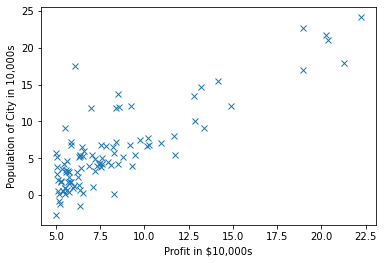

In [141]:
plt.plot(X[:,1],Y,'x', markersize=6)
plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")

# Initial parameters

theta = np.zeros((dim,1))
iteration = 1500
alpha = 0.01

# compute cost

In [127]:
def compute_cost(X,Y, theta):
    m = X.shape[0]
    J = 0

    h = np.dot(X, theta)
    J = (1/(2*m)) * np.sum(np.power(h-Y,2))
    return J

In [129]:
print(compute_cost(X,Y,theta))
print(compute_cost(X,Y,[[-1], [2]]))

32.072733877455676
54.24245508201238


expected outputs are 32.07 and 54.24

# Gradient descent

In [130]:
def gradient_descent(X, Y, theta, alpha, iteration):
    m = X.shape[0]
    history = np.zeros(iteration)
    
    for i in range(iteration):
        
        h = np.dot(X, theta)

        gradJ = (1/m) * np.dot(X.T, h-Y)
        theta = theta - alpha * gradJ
        
        history[i] = compute_cost(X, Y, theta)
        
    return theta, history

theta, history = gradient_descent(X, Y, theta, alpha, iteration)

In [132]:
print(theta)

[[-3.63029144]
 [ 1.16636235]]


expected output is [[-3.63029144]
 [ 1.16636235]]

# visualize cost function and predicted line

Text(0, 0.5, 'Cost')

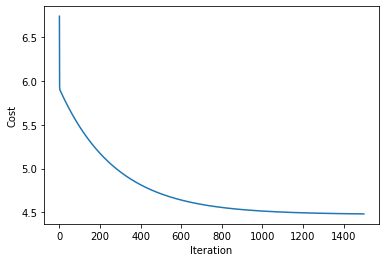

In [135]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Cost")

Text(0, 0.5, 'Population of City in 10,000s')

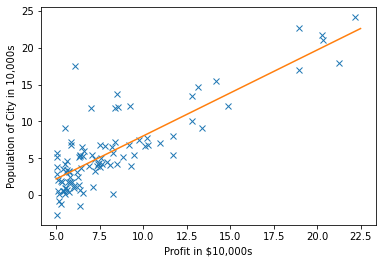

In [142]:
plt.plot(X[:,1],Y,'x', markersize=6)

xt = np.linspace(5,22.5,100)
yt = theta[0] + theta[1] * xt
plt.plot(xt,yt)

plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")

# Todo List:
* linear regression with multiple variables
* feature normalization
* testing different learning rate
* normal equations